# Tensor methods for nonuniform hypergraphs

In [1]:
from utils import *
from standalone_tensor_algs import *
from standalone_tensor_eigs import *
from tensor_decomp import *
import numpy as np
from time import time

import scipy

# TTSV1

Compute TTSV1

In [2]:
#choose max hyperedge size
r = 10
#choose dataset (download )
## DOWNLOAD dataset from https://www.cs.cornell.edu/~arb/data/cat-edge-DAWN/, put unzipped folder into the data folder!
name = 'cat-edge-DAWN'
# compute node to hyperedges dict (E) and hyperedge to nodes dict (H)
E, H = parse_hyper(name, max_edge_size = r)
n = len(E)
np.random.seed(0)
# this is the vector which we use in the ttsv1
a = np.random.random(n)
s = ttsv1(E, H, r, a)
len(s)

2078

# TTSV2

Compute TTSV2

In [3]:
#choose max hyperedge size
r = 10
#choose dataset
name = 'cat-edge-DAWN'
# compute node to hyperedges dict (E) and hyperedge to nodes dict (H)
E, H = parse_hyper(name, max_edge_size = r)
n = len(E)
# compute pairwise incidence dict (EE)
EE = pairwise_incidence(H, r)
# np.random.seed(0)
# this is the vector which we use in the ttsv2
a = np.random.random(n)
s = ttsv2(EE, H, r, a, n)
s


<2078x2078 sparse array of type '<class 'numpy.float64'>'
	with 151147 stored elements in Compressed Sparse Row format>

# Tensor eigenvector centrality

## Z-eigenvector

In [4]:
#choose max hyperedge size
r = 3
#choose dataset
name = 'cat-edge-DAWN'
# compute node to hyperedges dict (E) and hyperedge to nodes dict (H)
E, H = parse_hyper(name, max_edge_size = r)
n = len(E)
# get the largest connected component
_E, _H, _r, _n = get_largest_connected_component(H, E, n, return_label_map = False)
# compute pairwise incidence dict (EE)
EE = pairwise_incidence(_H, _r)
# compute the z eigenvector centrality vector z_evec
z_evec, z_converged = GZEC(EE, _H, _r, _n)

0 of 199
1 of 199
2 of 199
3 of 199
4 of 199
5 of 199
6 of 199
7 of 199
8 of 199
9 of 199
10 of 199
11 of 199
12 of 199
13 of 199
14 of 199
15 of 199
16 of 199
17 of 199
18 of 199
19 of 199
20 of 199
21 of 199
22 of 199
23 of 199
24 of 199
25 of 199
26 of 199
27 of 199
28 of 199
29 of 199
30 of 199
31 of 199
32 of 199
33 of 199
34 of 199
35 of 199
36 of 199
37 of 199
38 of 199
39 of 199
40 of 199
41 of 199
42 of 199
43 of 199
44 of 199
45 of 199
46 of 199


In [5]:
z_evec

array([1.22619960e-03, 7.63703810e-06, 8.52579131e-04, ...,
       3.90786123e-09, 1.82403948e-09, 1.84955171e-09])

## H-eigenvector

In [7]:
# compute the H-eigenvector centrality vector h_evec
h_evec, h_converged = GHEC(_E, _H, _r)

0 of 199
1 of 199
2 of 199
3 of 199
4 of 199
5 of 199
6 of 199
7 of 199
8 of 199
9 of 199
10 of 199
11 of 199
12 of 199
13 of 199
14 of 199


In [8]:
h_evec

array([5.64960770e-03, 4.52592722e-04, 2.75552645e-03, ...,
       9.49426920e-05, 7.26665464e-06, 2.98865875e-05])

## clique-projection eigenvector centrality

In [9]:
# get the adjacency matrix of the clique projection
A = get_adjacency(H, n)
# compute the clique-projection centrality vector c_evec
c_evec, _ = GCEC(A)

In [10]:
c_evec

array([1.72558532e-02, 1.10150676e-04, 4.06606078e-03, ...,
       6.41445229e-06, 5.31758119e-08, 5.35556388e-07])

# CP-decomposition

Get an embedding using the Zhou approach first

new r is  8


/Users/ambu249/opt/anaconda3/envs/hyper/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ambu249/opt/anaconda3/envs/hyper/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


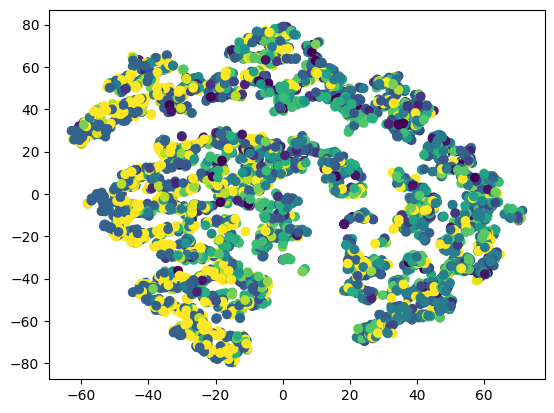

In [2]:
import math
from sklearn.cluster import KMeans

from scipy.sparse import diags

# r = 36
q = 5
## DOWNLOAD dataset from https://www.cs.cornell.edu/~arb/data/cat-edge-Cooking/, put unzipped folder into the data folder!
name = 'cat-edge-Cooking'
_r = 8
deg_frac = 0.2
E, H, category = get_parsed_hyper(name, _r, deg_frac)
r = max([len(nodes) for e, nodes in H.items()])
print('new r is ', r)
n = len(E)
A = get_adjacency(H, n, weighted = False)
degrees = np.sum(A, axis=1)
d = []
for i in range(n):
    d.append(degrees[i])
d = [1 / math.sqrt(degree) for degree in d]
D = diags(d)
A = D @ A @ D
In = diags([1.0 for i in range(n)])
L = 0.5 * (In - A)
l, V = eigsh(L, k=q, which="SM")
kmeans = KMeans(n_clusters=q).fit(V[:,2:])
# kmeans = KMeans(n_clusters=q).fit(V)
zhou_labels = kmeans.labels_
from sklearn.manifold import TSNE
# X_zhou = TSNE().fit_transform(V[:,1:])
X_zhou = TSNE().fit_transform(V)

import matplotlib.pyplot as plt
plt.scatter(X_zhou[:,0],X_zhou[:,1], c = category)

Compute the CP decomposition, starting at the Zhou embedding

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        22395     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73107D-01    |proj g|=  3.49748D+00


 This problem is unconstrained.



At iterate    1    f=  2.06963D-01    |proj g|=  2.44315D+00

At iterate    2    f=  4.41106D-02    |proj g|=  3.21603D-01

At iterate    3    f=  3.64150D-02    |proj g|=  2.77246D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
22395      3      5      1     0     0   2.772D-01   3.642D-02
  F =   3.6415004999606142E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ambu249/opt/anaconda3/envs/hyper/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ambu249/opt/anaconda3/envs/hyper/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


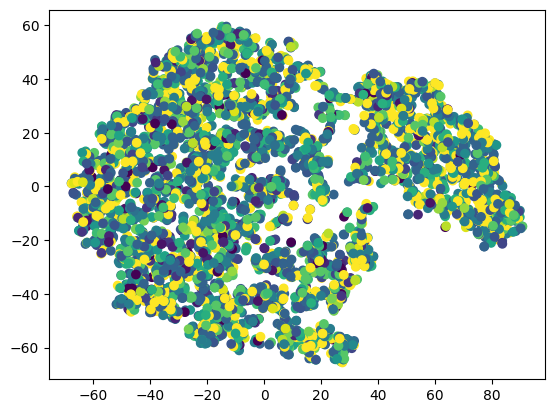

In [5]:
res = scipy.optimize.minimize(fg_implicit, x0 = np.concatenate((l, V.flatten(order = 'F'))), args = (E, H, q, r, d), method = 'L-BFGS-B', jac=True, tol = 1e-2, options={'maxiter': 100, 'maxfun': 100, 'disp':  True, 'gtol': 1e-4})
from sklearn.manifold import TSNE
x = res.x
CP_decomp = x[q:].reshape((n, q))
X = TSNE().fit_transform(CP_decomp)
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c = category)